In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import os, sys 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import geopandas as gpd
import h3pandas 
sys.path.append('../../../reproducible_figures/scripts/')
import rep_fig_vis as rfv
sys.path.append('../../scripts/')
import create_dataset_utils as cdu
sys.path.append('../../../cnn-land-cover/scripts/')
import land_cover_analysis as lca 
import land_cover_visualisation as lcv

dict_keys(['image_path', 'mask_path', 'tiles_few_changes_path', 'lc_80s_path', 'landscape_character_grid_path', 'evaluation_50tiles', 'evaluation_50tiles_polygons', 'pd_outline', 'home'])


In [5]:
df = cdu.load_df_gbif()
df = df[df['year'] == 2018]

/Users/t.vanderplas/anaconda3/envs/satbird/lib/python3.10/site-packages/dwca/read.py:203: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(self.absolute_temporary_path(relative_path), **kwargs)


Loaded GBIF dataset with 8165207 records


Unique number of points 2572 out of 8165207


12it [02:10, 10.91s/it]


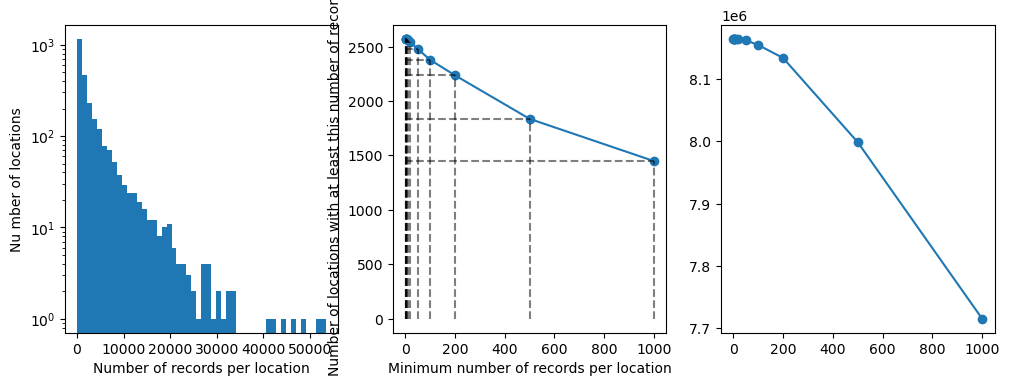

In [15]:
cdu.plot_obs_per_location(df)

In [6]:
df_clean = cdu.clean_bms_data(df, threshold_n_obs_per_location=200)

Kept 485522 records at locations with at least 200 observations
Unique number of locations 1072 out of 539035


In [7]:
df_minimal = cdu.create_minimal_df_bms(df_clean)
df_minimal.head(2)

,footprintWKT,eventDate,year,month,day,species,speciesKey,tuple_coords,polygon
32,"POLYGON((-1.65832 51.14077,-1.65832 51.14972,-...",2018-07-02T00:00:00,2018,7,2,Aphantopus hyperantus,1896841,"(-1.65114, 51.145244)","POLYGON ((-1.65832 51.14077, -1.65832 51.14972..."
80,"POLYGON((-1.45978 51.00514,-1.45978 51.01406,-...",2018-06-12T00:00:00,2018,6,12,Pararge aegeria,8049830,"(-1.452605, 51.009601)","POLYGON ((-1.45978 51.00514, -1.45978 51.01406..."


In [8]:
df_summary, species_list = cdu.create_species_presence_per_loc_and_date(df_minimal)
df_summary.head(2)

Unique number of species 62
Number of location/date combis 24258


,tuple_coords,eventDate,Aphantopus hyperantus,Pararge aegeria,Pieris napi,Aglais io,Vanessa atalanta,Pieris rapae,Maniola jurtina,Thymelicus sylvestris,...,Odezia atrata,Euclidia glyphica,Coenonympha tullia,Carterocephalus palaemon,Fixsenia pruni,Tyria jacobaeae,Melitaea cinxia,Nymphalis polychloros,Nymphalis antiopa,Erebia epiphron
0,"(-6.753205, 55.169256)",2018-05-05T00:00:00,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"(-6.753205, 55.169256)",2018-05-12T00:00:00,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Number of clusters 12


/Users/t.vanderplas/anaconda3/envs/satbird/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/t.vanderplas/anaconda3/envs/satbird/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


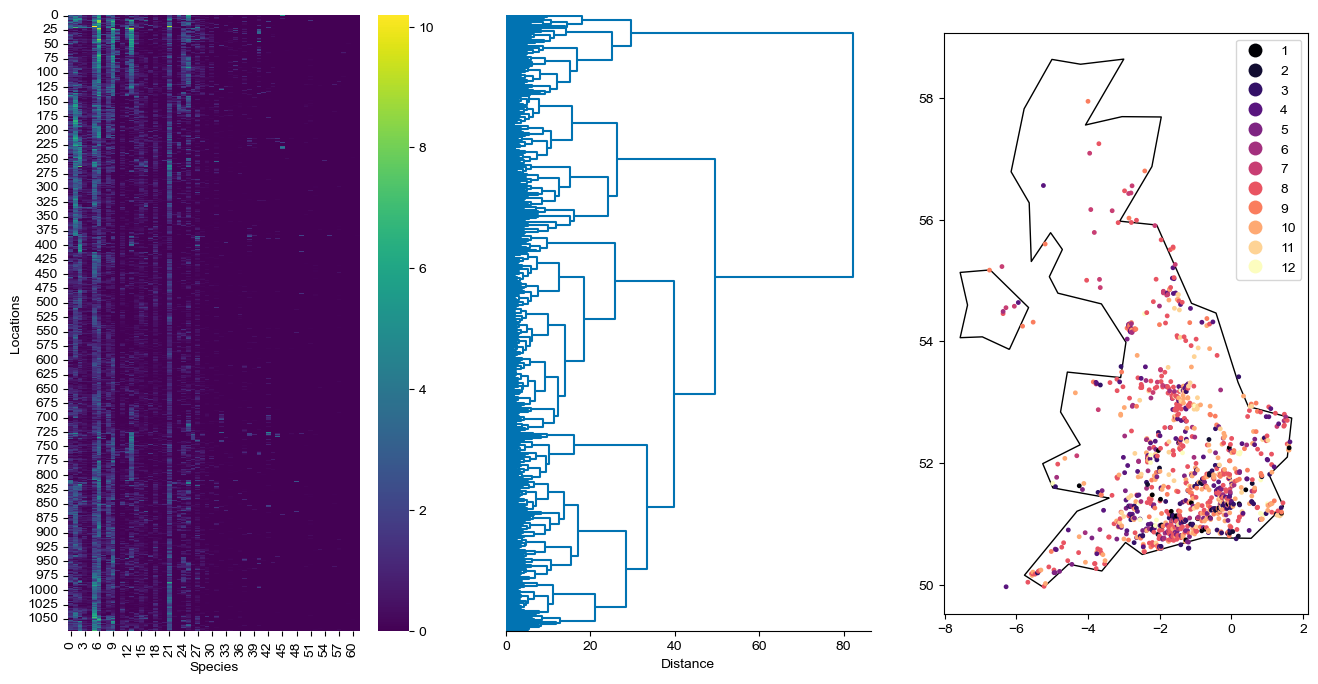

In [9]:
cdu.plot_clusters_species_per_loc(df_summary, species_list)

In [10]:
df_summary

,tuple_coords,eventDate,Aphantopus hyperantus,Pararge aegeria,Pieris napi,Aglais io,Vanessa atalanta,Pieris rapae,Maniola jurtina,Thymelicus sylvestris,...,Euclidia glyphica,Coenonympha tullia,Carterocephalus palaemon,Fixsenia pruni,Tyria jacobaeae,Melitaea cinxia,Nymphalis polychloros,Nymphalis antiopa,Erebia epiphron,n_visits
0,"(-6.753205, 55.169256)",2018-05-05T00:00:00,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,"(-6.753205, 55.169256)",2018-05-12T00:00:00,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,"(-6.753205, 55.169256)",2018-05-19T00:00:00,0,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,"(-6.753205, 55.169256)",2018-05-23T00:00:00,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,"(-6.753205, 55.169256)",2018-05-29T00:00:00,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24253,"(1.632597, 52.348661)",2018-08-03T00:00:00,0,3,4,0,0,5,1,0,...,0,0,0,0,0,0,0,0,0,1
24254,"(1.632597, 52.348661)",2018-08-11T00:00:00,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
24255,"(1.632597, 52.348661)",2018-08-17T00:00:00,0,4,1,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,1
24256,"(1.632597, 52.348661)",2018-08-31T00:00:00,0,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## get GEE sentinel image

In [11]:
ex_xy_coords = np.array(df_clean.iloc[0].polygon.exterior.coords.xy).T 
ex_xy_coords

array([[-1.65832, 51.14077],
       [-1.65832, 51.14972],
       [-1.64396, 51.14972],
       [-1.64396, 51.14077],
       [-1.65832, 51.14077]])

In [12]:
import ee, geemap 

ee.Authenticate()
ee.Initialize(project='ee-biodiv-mon')
geemap.ee_initialize()

In [13]:
aoi = ee.Geometry.Polygon(ex_xy_coords.tolist())
# buffer_dist = 
aoi = aoi.buffer(800).bounds()
ex_collection = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')

ex_im_gee = ee.Image(ex_collection 
                    #    .project(crs='EPSG:27700', scale=1)
                       .filterBounds(aoi) 
                       .filterDate(ee.Date('2020-08-01'), ee.Date('2020-10-21')) 
                       .sort('CLOUDY_PIXEL_PERCENTAGE')
                       .select(['B4', 'B3', 'B2', 'B8'])
                       .first() 
                       .clip(aoi))
print(ex_im_gee.projection().getInfo())

# print(f'Area AOI in km2: {aoi.area().getInfo() / 1e6}')
print(f'Pixel dimensions: {ex_im_gee.getInfo()["bands"][0]["dimensions"]}')
ex_im_gee.getInfo()['bands'][3]

{'type': 'Projection', 'crs': 'EPSG:32630', 'transform': [10, 0, 499980, 0, -10, 5700000]}
Pixel dimensions: [267, 266]


{'id': 'B8',
 'data_type': {'type': 'PixelType',
  'precision': 'int',
  'min': 0,
  'max': 65535},
 'dimensions': [267, 266],
 'origin': [9304, 3183],
 'crs': 'EPSG:32630',
 'crs_transform': [10, 0, 499980, 0, -10, 5700000]}

In [14]:
ex_im_gee.

SyntaxError: invalid syntax (1364154792.py, line 1)

In [15]:
Map = geemap.Map()

vis_params = {'min': 0, 'max': 3000}

Map.centerObject(ex_im_gee, 8)
Map.addLayer(ex_im_gee, vis_params)

fc = ee.FeatureCollection(aoi)
style = {'color': 'ffff00ff', 'fillColor': '00000000'}
Map.addLayer(fc.style(**style), {}, 'ROI')

# ## add point:
# Map.addLayer(point, {}, 'point')

Map


Map(center=[51.145244867644664, -1.651139999989428], controls=(WidgetControl(options=['position', 'transparent…

In [16]:
# geemap.download_ee_image(ex_im_gee, "sentinel2_example.tif", scale=10, crs='EPSG:32630')

In [62]:
geemap.ee_export_image(
    ex_im_gee, filename='sentinel2_example.tif', scale=10, file_per_band=False
)

Generating URL ...
Please wait ...
Data downloaded to /Users/t.vanderplas/repos/PECL/notebooks/try-out/sentinel2_example.tif


In [35]:
filepath = 'sentinel2_example.tif'
im_loaded = lca.load_tiff(filepath, datatype='da')

In [36]:
perc_non_zero = np.sum(im_loaded != 0) / np.prod(im_loaded.shape)
print(f'Percentage non-zero: {perc_non_zero}')

Percentage non-zero: <xarray.DataArray ()>
array(0.96135)
Coordinates:
    spatial_ref  int64 0


In [37]:
## normalise by clipping to 3000 and dividing by 3000/255
im_loaded = np.clip(im_loaded, 0, 3000)
im_loaded = im_loaded / (3000)
im_loaded = im_loaded[:3, ...]
print(im_loaded.shape, type(im_loaded))

(3, 266, 267) <class 'xarray.core.dataarray.DataArray'>


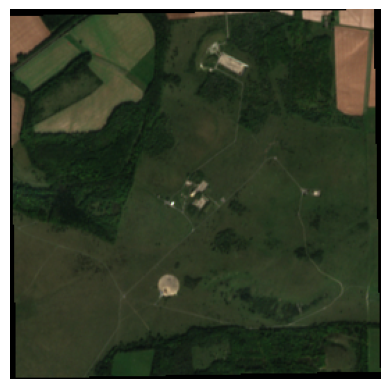

In [38]:
lcv.plot_image_simple(im_loaded)